<a href="https://colab.research.google.com/github/alsrn36533/PB02/blob/main/pdm02_chest_xray_TL22_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TL : EfficientNetB1
---

## Chest X-ray dataset
- NORMAL
- PNEUMONIA 

## dataset
- chest_xray_data/val/PNEUMONIA 8
- chest_xray_data/val/NORMAL 8
- chest_xray_data/test/PNEUMONIA 390
- chest_xray_data/test/NORMAL 234
- chest_xray_data/train/PNEUMONIA 3875
- chest_xray_data/train/NORMAL 1341

In [1]:
# Down chest_xray_data.zip from Google drive
# https://drive.google.com/file/d/1rLbgIAsHLB-3OBR4mdhXQcBehz2qzVR2/view?usp=sharing
!gdown https://drive.google.com/uc?id=1rLbgIAsHLB-3OBR4mdhXQcBehz2qzVR2

# Use this code when errors occur during downloading dataset.
# When the above link does not work due to virus checking, use one of the below methods to download dataset.
# !wget http://life21c.inje.ac.kr:3030/data/chest_xray_data.zip
!wget http://chaos.inje.ac.kr:3030/data/chest_xray_data.zip

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1rLbgIAsHLB-3OBR4mdhXQcBehz2qzVR2 

--2022-12-13 20:10:14--  http://chaos.inje.ac.kr:3030/data/chest_xray_data.zip
Resolving chaos.inje.ac.kr (chaos.inje.ac.kr)... 203.241.251.51
Connecting to chaos.inje.ac.kr (chaos.inje.ac.kr)|203.241.251.51|:3030... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1225713864 (1.1G) [application/zip]
Saving to: ‘chest_xray_data.zip’

chest_xray_data.zip 100%[===================>]   1.14G  2.90MB/s    in 5m 47s  

2022-12-13 20:16:02 (3.37 MB/s) - ‘chest_xray_data.zip’ saved [1225713864/1225713864]



In [3]:
!unzip chest_xray_data.zip   # -d chest_xray_data


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: chest_xray_data/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0448-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0449-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0450-0001.jpeg  
  inflating: chest_

In [4]:
!ls chest_xray_data

test  train  val


In [5]:
import os
path = 'chest_xray_data'
# 서브 디렉토리별 파일 개수 출력
for root, subdirs, files in os.walk(path):
    if len(files) > 0:
        print(root, len(files))

chest_xray_data/train/NORMAL 1341
chest_xray_data/train/PNEUMONIA 3875
chest_xray_data/val/NORMAL 8
chest_xray_data/val/PNEUMONIA 8
chest_xray_data/test/NORMAL 234
chest_xray_data/test/PNEUMONIA 390


In [6]:
# import
import matplotlib.pyplot as plt 
from matplotlib.image import imread
import tensorflow
from tensorflow.keras import models, layers
from keras.models import Model
from keras.layers import Input 
import cv2


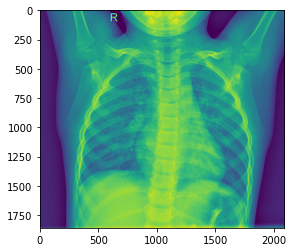

In [7]:
# sample image
image = imread('chest_xray_data/train/NORMAL/IM-0115-0001.jpeg')
image.shape
plt.imshow(image) # ,cmap='Greys')
plt.show()

Image shape: (941, 1612)


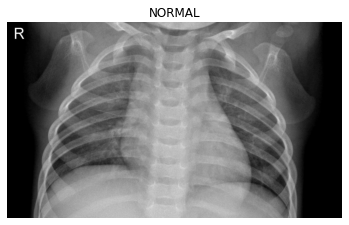

In [8]:
# View a random image
train_dir = './chest_xray_data/train'
test_dir = './chest_xray_data/test'
validation_dir = './chest_xray_data/val'

import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+'/'+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img, cmap = "gray")
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

# classes = ['NORMAL', 'PNEUMONIA']
img = view_random_image(target_dir = test_dir, target_class = "NORMAL")
# img = tensorflow.constant(img)
plt.show()


---

## tensorflow dataset from local images

In [9]:
## Setting up the data

## Set the image size 
IMG_SIZE = (224, 224)# 100만장의 사진을 다룰때 가장 적합한 사이즈가 224,224임.
batchSize = 32

print("Training Images:")
train_data = tensorflow.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                 image_size = IMG_SIZE,
                                                                 label_mode = "binary",
                                                                 color_mode = "grayscale",
                                                                 batch_size = batchSize)

print("Testing Images:")
test_data = tensorflow.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                 image_size = IMG_SIZE,
                                                                 label_mode = "binary",
                                                                 color_mode = "grayscale",
                                                                 batch_size = batchSize)

print("Validation Images:")
val_data = tensorflow.keras.preprocessing.image_dataset_from_directory(directory = validation_dir,
                                                                 image_size = IMG_SIZE,
                                                                 label_mode = "binary",
                                                                 color_mode = "grayscale",
                                                                 batch_size = batchSize)

Training Images:
Found 5216 files belonging to 2 classes.
Testing Images:
Found 624 files belonging to 2 classes.
Validation Images:
Found 16 files belonging to 2 classes.


In [10]:
len(train_data),len(test_data),len(val_data)

(163, 20, 1)

In [11]:
# Inspecting the train_data
train_data   # BatchDataset
# <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 1), dtype=tf.float32, name=None), 
# TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

## Visualize images from dataset

(32, 224, 224, 1) tf.Tensor(
[[1.]
 [1.]
 [1.]
 [0.]
 [0.]], shape=(5, 1), dtype=float32)


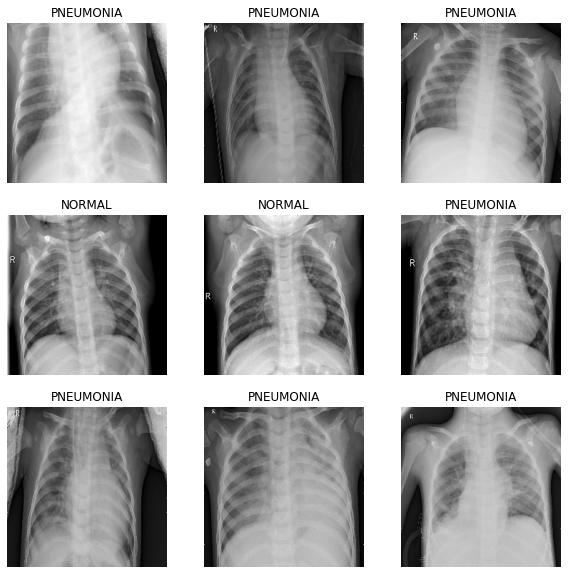

==================== Test dataset ====================
(32, 224, 224, 1) tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]], shape=(5, 1), dtype=float32)


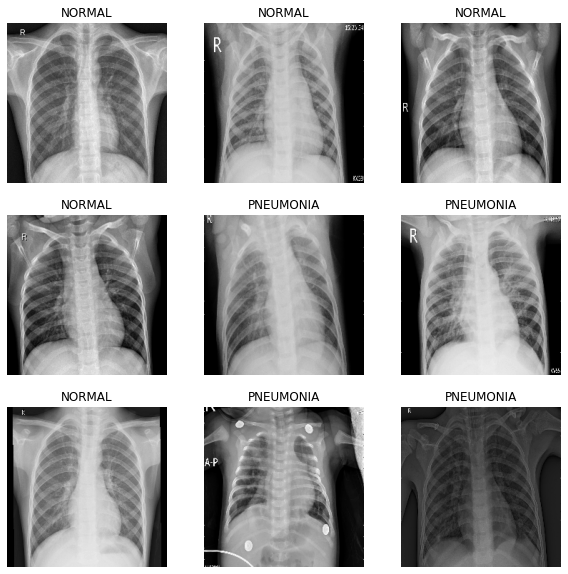

In [12]:
# Plot images from dataset
# figure 크기를 조절합니다.
plt.figure(figsize=(10, 10))
names = ['NORMAL', 'PNEUMONIA']
# 배치 하나를 가져옵니다.
for images, labels in train_data.take(1):# 하나의 배치를 가져옴 하나의 배치에는 32개의 사진이 들어있고 32개의 레이블이 들어있음 0은 노말 1은 비정상.
    print(images.shape, labels[:5])
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i][:,:,0].numpy().astype("uint8"), cmap = "gray") #.numpy())
        plt.title(names[int(labels[i])])
        plt.axis("off")
plt.show()

# [DIY] Plot images from test dataset
print("="*20, 'Test dataset', "="*20)
plt.figure(figsize=(10, 10))
# names = ['NORMAL', 'PNEUMONIA']
# 배치 하나를 가져옵니다.
for images, labels in test_data.take(1):# 하나의 배치를 가져옴 하나의 배치에는 32개의 사진이 들어있고 32개의 레이블이 들어있음 0은 노말 1은 비정상.
    print(images.shape, labels[:5])
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i][:,:,0].numpy().astype("uint8"), cmap = "gray") #.numpy())
        plt.title(names[int(labels[i])])
        plt.axis("off")
plt.show()


## Data Augmentation (데이터 증대)

In [13]:
#
# Data augmentation
#
# Create a data augmentation stage with horizontal flipping, rotations, zooms
#
tensorflow.get_logger().setLevel('ERROR')  # Clear warnings in data augmentation

from tensorflow import keras
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),  # Not compatible with model
  layers.RandomWidth(0.2),
  # layers.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")


### Visualize the augmented images

========================= Train dataset =========================
tf.Tensor(
[[0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]], shape=(32, 1), dtype=float32) (32, 224, 224, 1)
(1, 180, 268, 1)
(1, 181, 252, 1)
(1, 251, 197, 1)
(1, 265, 216, 1)
(1, 224, 183, 1)
(1, 195, 228, 1)
(1, 196, 256, 1)
(1, 232, 205, 1)
(1, 199, 195, 1)


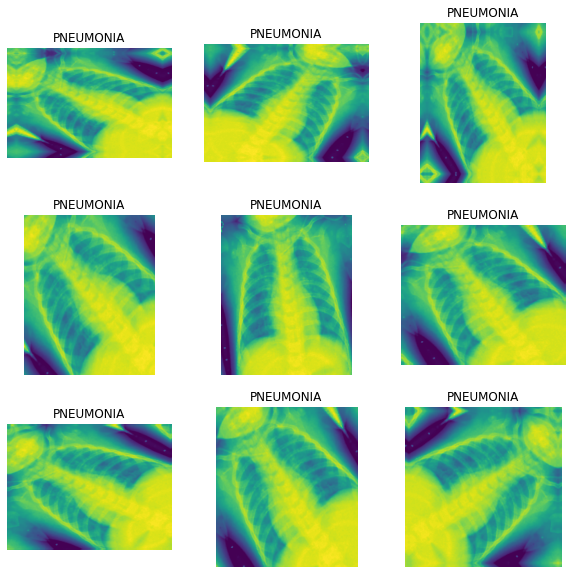

========================= Test dataset =========================
tf.Tensor(
[[1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]], shape=(32, 1), dtype=float32) (32, 224, 224, 1)
(1, 259, 216, 1)
(1, 224, 213, 1)
(1, 190, 256, 1)
(1, 259, 260, 1)
(1, 189, 239, 1)
(1, 253, 239, 1)
(1, 185, 181, 1)
(1, 228, 200, 1)
(1, 200, 260, 1)


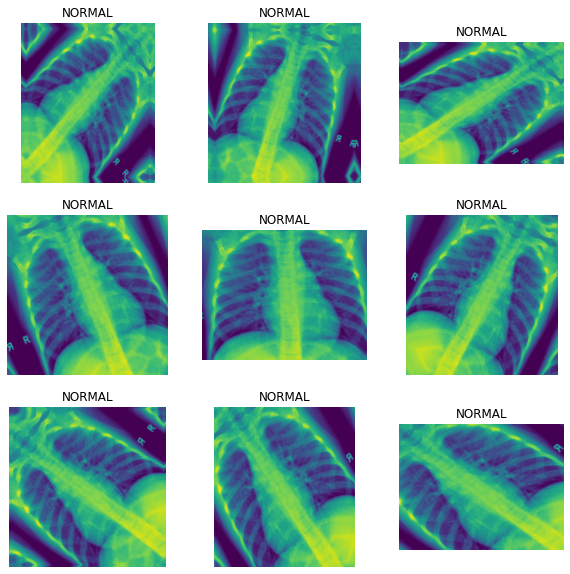

In [14]:
#
# Visualize the augmented images
#
print("="*25, 'Train dataset', "="*25)
plt.figure(figsize=(10,10))
image_idx = 5
for images, labels in train_data.take(1):    # Make a batch of images & labels
    print(labels,images.shape)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        aug_img = data_augmentation(tensorflow.expand_dims(images[image_idx], axis=0))
        print(aug_img.shape)
        plt.imshow(aug_img[0][:,:,0].numpy().astype("uint8"))
        plt.title("{}".format(names[int(labels[image_idx])]))
        plt.axis("off")
    break
plt.show()

print("="*25, 'Test dataset', "="*25)
plt.figure(figsize=(10,10))
image_idx = 5
for images, labels in test_data.take(1):    # Make a batch of images & labels
    print(labels,images.shape)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        aug_img = data_augmentation(tensorflow.expand_dims(images[image_idx], axis=0))
        print(aug_img.shape)
        plt.imshow(aug_img[0][:,:,0].numpy().astype("uint8"))
        plt.title("{}".format(names[int(labels[image_idx])]))
        plt.axis("off")
    break
plt.show()

# Model: Transfer learning
- ## EfficientNetB1

In [15]:
# tensorflow
tensorflow.image.grayscale_to_rgb(
    images,
    name=None
)

# scikit-image
from skimage.color import gray2rgb
rgb_img = gray2rgb

# opencv
cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

array([[[ 22,  22,  22],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [ 96,  96,  96],
        [ 94,  94,  94],
        [ 93,  93,  93]],

       [[ 23,  23,  23],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [ 97,  97,  97],
        [ 94,  94,  94],
        [ 92,  92,  92]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23],
        ...,
        [ 99,  99,  99],
        [ 96,  96,  96],
        [ 94,  94,  94]],

       ...,

       [[ 49,  49,  49],
        [ 50,  50,  50],
        [ 48,  48,  48],
        ...,
        [119, 119, 119],
        [119, 119, 119],
        [119, 119, 119]],

       [[ 50,  50,  50],
        [ 52,  52,  52],
        [ 53,  53,  53],
        ...,
        [123, 123, 123],
        [124, 124, 124],
        [123, 123, 123]],

       [[ 52,  52,  52],
        [ 53,  53,  53],
        [ 54,  54,  54],
        ...,
        [129, 129, 129],
        [128, 128, 128],
        [127, 127, 127]]

In [16]:
import tensorflow as tf
resnet_model = tensorflow.keras.applications.ResNet50(weights='imagenet', include_top=False)
resnet_model.trainable = True
input = layers.Input(shape=(224, 224, 1), name="input")
x = tf.keras.layers.Concatenate()([input, input, input])
x = tf.cast(x, tf.float32)
x = tf.keras.applications.resnet50.preprocess_input(x)
x = resnet_model(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.25)(x)
out = layers.Dense(1, activation='relu')(x)

res_model = Model(inputs=input, outputs=out)

res_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
              loss = 'binary_crossentropy', # 0~1두가지 구분 = binary crosentropy
              metrics = ['accuracy'])

res_model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 concatenate (Concatenate)      (None, 224, 224, 3)  0           ['input[0][0]',                  
                                                                  'input[0][0]',                  
                                                                  'input[0][0]']                  
                                                                                                  
 tf.cast (TFOpLambda)        

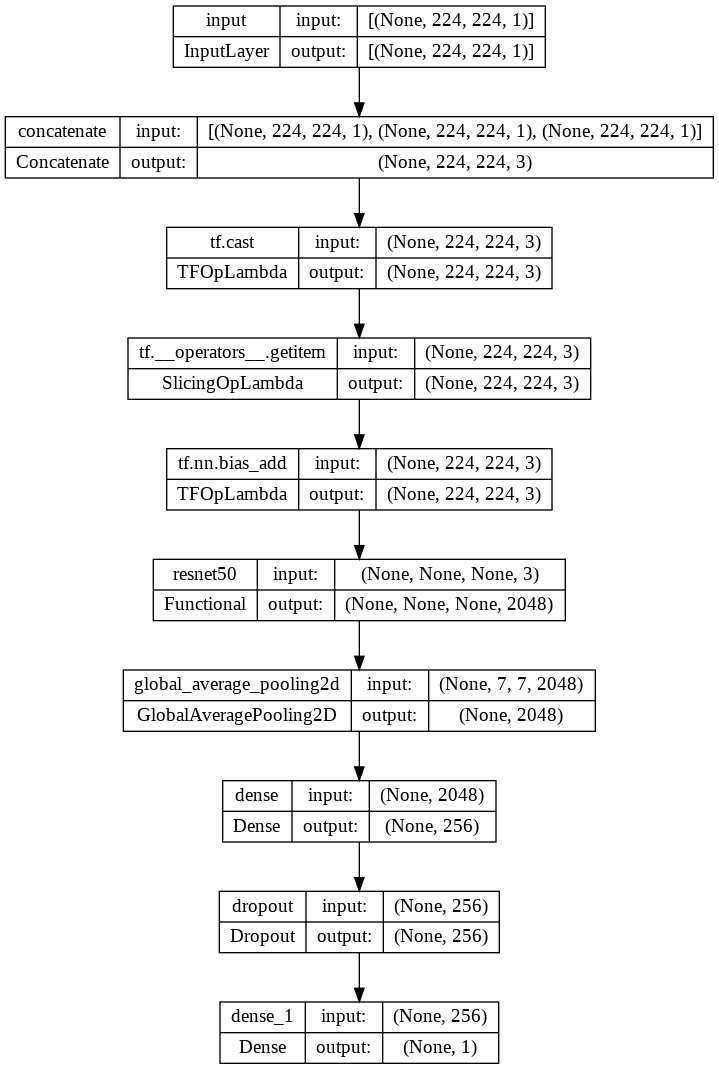

In [17]:
# from tensorflow import keras
keras.utils.plot_model(res_model, show_shapes=True)

In [18]:
len(train_data),len(test_data)  # 5216/32, 624/32, batch_size=20

(163, 20)

# Building the Model

In [19]:
# Setting up the callbacks
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=10) # if val loss decreases for 10 epochs in a row, stop training
# Creating learning rate reduction callback
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.25, # multiply the learning rate by 0.2 (reduce by 4x)
                                                 patience=4,  # 3,4,5
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)
cp_callback = keras.callbacks.ModelCheckpoint(filepath="./model/chest_xray_TL_resnet50_best_weights.{epoch:02d}-{val_accuracy:.3f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)

## Check the summary
for no, layer in enumerate(res_model.layers):
  print(no, layer.trainable)


0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True


In [ ]:
######################################################
# Training model using augmentated data
######################################################
#

%%time
history = res_model.fit(train_data, 
                    epochs=100, 
                    steps_per_epoch = len(train_data), 
                    validation_data = test_data,
                    validation_steps = len(test_data), # batchSize,
                    callbacks = [cp_callback, early_stopping, reduce_lr])


Epoch 1/100
 12/163 [=>............................] - ETA: 59:55 - loss: 1.5035 - accuracy: 0.7917  

### Training graphs

In [ ]:
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Overfitted a little!

---

In [ ]:
res_model.evaluate(test_data)

In [ ]:
pred = res_model.predict(test_data)

In [ ]:
pred.shape,pred[:10]

## CONFUSION MATRIX

In [ ]:
from keras.models import load_model

model_best = load_model('model/chest_xray_TL_resnet50_best_weights.08-0.864.hdf5')
# model_best.evaluate(X_test, y_test)  #, batch_size=BATCH_SIZE)

In [ ]:
# Correct-handling with tf_dataset - test_data,unbatch()
from sklearn.metrics import confusion_matrix

y_test=[]
y_pred=[]
for images, labels in test_data.unbatch():   # 개개의 이미지에 대한 예측과 label에 수집
    # print(images.shape,labels.shape)
    y_pred0 = model_best.predict(np.expand_dims(images, axis=0), verbose=0) #, batch_size=1)  
    y_pred.append(np.round(y_pred0[0]))  #, axis=0)
    y_test.append(labels.numpy())
    # break

print(len(y_test),len(y_pred))
# print(y_test.shape,y_pred.shape)

print("정답=", y_test[0])
print("예측값=", y_pred[0]) #, np.round(y_pred0[0]))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

In [ ]:
# Testing code
# y_pred0,len(y_test),len(y_pred), y_pred[:5], y_test[:5]

In [ ]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm, cbar=False, xticklabels=names, yticklabels=names, fmt='d', annot=True, cmap=plt.cm.Greens) #coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion matrix, ACC={round(acc,3)}', fontsize=16)
plt.show()

In [ ]:
# 아래 코드를 사용하면 틀린 결과를 얻게됩니다. => 왜 사용 금지?
# Wrong-handling with tf_dataset - test_data를 사용할 때마다 다른 iterate가 생성됨.
from sklearn.metrics import confusion_matrix
y_pred0 = model_best.predict(test_data)
y_pred = list(np.round(y_pred0))  #, axis=0)
y_test = [labels.numpy() for _, labels in test_data.unbatch()]
print("정답=", y_test[0])
print("예측값=", y_pred[0], np.round(y_pred0[0]))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

---
## **전이(전환)학습 방법**
1. 데이터 수집
2. 데이터세트 구성 (train,test,validation): tf.keras.preprocessing.image_dataset_from_directory
3. 데이터 증대 (Data augmentation)
4. 모델 구성: imagenet 모델 연결, 레이어 학습 조건 설정
5. 콜백 조건 설정
6. 모델 학습 및 테스트
    - steps_per_epoch = len(train_data)
    - validation_data = test_data
    - validation_steps = len(test_data)

> steps_per_epoch를 전체데이터의 길이로 설정: 학습 시간이 길어지나 작을 val_loss를 가진 모델을 구할 수 있디.
> validation_steps은 테스트데이터 길이의 25~100으로 조정 가능 %

---

# [DIY-예비실기평가] 위의 전이학습 코드에 다음 내용을 추가하시오.

1. EfficientNetB1 모델에 대한 전이학습에 Fine-Tuning을 적용하여 학습시키시오. 
- [hint] https://github.com/Redwoods/pdm/blob/main/project/cifar10/cifar10_100pct_TL123.ipynb
2. 모델을 학습시키면서 val_accuracy가 최대인 가중치 파일을 저장하시오.
3. 저장된 best model을 이용하여 혼동행렬을 구하고 혼동행렬을 그리시오.
4. 완성된 ipynb 파일을 chaos21c@gamil.com 으로 보내시오.
- 제출파일명 :  **pdmxx**_chest_xray_TL1_EfficientNetB1.ipynb

---
---

# [기말 실기 안내]

- 시간: 12월 14일(수) 오후 1시 (E507)

## 실기 내용
1. chest_xray_data를 Resnet50을 적용해서 전이학습을 시키시오.
```
base_model = keras.applications.resnet50.ResNet50(include_top = False)
```
- 다음 문제를 해결하시오.
```
# Check the grayscale input and output of base_model
ix=layers.Input(shape=(224,224,1))
print(base_model(ix))
```

> Error, Input 0 of layer "conv1_conv" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 230, 230, 1)

> [Hint] How to use grayscale image in ResNet50?

2. 모델을 학습시키면서 val_accuracy가 최대인 가중치 파일을 저장하시오.
3. 저장된 best model을 이용하여 혼동행렬을 구하고 혼동행렬을 그리시오.
4. 완성된 ipynb 파일을 chaos21c@gamil.com 으로 보내시오. (기말 실기 당일 실습실에서 제출.)
- 제출파일명 : pdmxx_chest_xray_TL2_Resnet50.ipynb
- 위의 코드를 미리 준비해서 각자의 google drive에 보관해서 사용.